# L1 - Introducción al aprendizaje supervisado

## Contexto:

Uno de los problemas más complejos de la actualidad es la autorización de créditos a clientes. Un desafío de interés tanto para las instituciones bancarias como para los negocios que ofrecen planes crediticios, ya que necesitan definir si el cliente cuenta o no con los requisitos para obtener el beneficio.

Esto puede considerarse un problema de clasificación, que se resolverá al generar un modelo que te permita clasificar o predecir si al solicitante se le asigna o no el crédito.

## 1.1 - Aprendizaje Supervisado

Para obtener el modelo de clasificación deseado, utilizaremos la técnica de aprendizaje supervisado, que se basa en un conjunto de entrenamiento compuesto por:

- **Variables de entrada**
- **Variable de salida**

En el caso de las autorizaciones crediticias, se manejan múltiples variables además del monto solicitado.

Usaremos datos del repositorio de la Universidad de California en Irvine (UCI), disponible en [UCI Machine Learning Repository](https://archive.ics.uci.edu/).

Trabajaremos con el conjunto de datos "German Credit Data", que contiene atributos de clientes que solicitan créditos. El objetivo es determinar si un cliente es confiable y si la solicitud de crédito representa un riesgo.


In [1]:
import pandas as pd

germandata = pd.read_csv('GermanCredit.csv')
display(germandata.head())
display(germandata.info())

,AsignarCredito,duracion,historial,proposito,monto,ahorros,edocivil,edad,otroscreditos,casa,otrosplanes,trabajo,carro,extranjero
0,0,18,4,2,1049,1,2,21,3,1,1,3,1,1
1,0,9,4,0,2799,1,3,36,3,1,2,3,1,1
2,0,12,2,9,841,2,2,23,3,1,1,2,1,1
3,0,12,4,0,2122,1,3,39,3,1,2,2,1,2
4,0,12,4,0,2171,1,3,38,1,2,2,2,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AsignarCredito  1000 non-null   int64
 1   duracion        1000 non-null   int64
 2   historial       1000 non-null   int64
 3   proposito       1000 non-null   int64
 4   monto           1000 non-null   int64
 5   ahorros         1000 non-null   int64
 6   edocivil        1000 non-null   int64
 7   edad            1000 non-null   int64
 8   otroscreditos   1000 non-null   int64
 9   casa            1000 non-null   int64
 10  otrosplanes     1000 non-null   int64
 11  trabajo         1000 non-null   int64
 12  carro           1000 non-null   int64
 13  extranjero      1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


None

**Nota:** Aquí observarás que la variable de salida, `AsignarCredito`, toma los valores de 0 para indicar que esta solicitud de crédito no representa un riesgo y el valor de 1 indicando que sí representa un riesgo. En lo sucesivo se denomina como `Y` a la variable de salida `AsignarCredito`.

Los valores históricos conocidos de 0s y 1s de la variable de salida `AsignarCredito` permiten considerar este problema como un problema de aprendizaje supervisado de clasificación. La finalidad será diseñar y entrenar un modelo de clasificación supervisado que pueda predecir a cuál de las dos clases pertenece cada registro:

- **Clase 1:** Cliente de riesgo (`AsignarCredito` = 1)
- **Clase 0:** Cliente no riesgoso (`AsignarCredito` = 0)

Aunque todas las variables están registradas como numéricas, una inspección revela que varias de ellas son categóricas o cualitativas. A continuación, se presenta la información sobre cada variable:

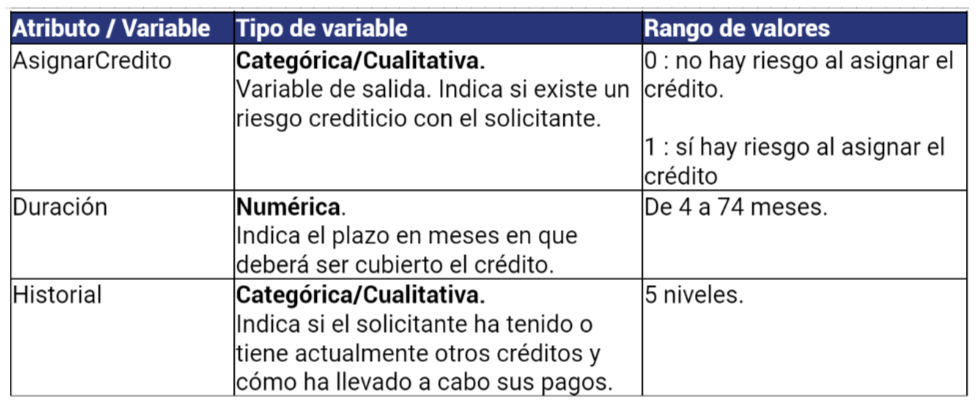
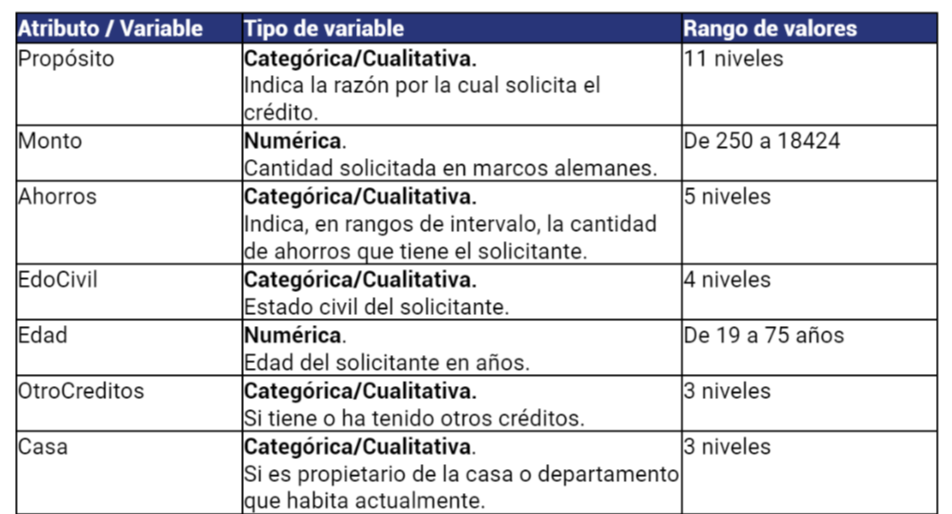
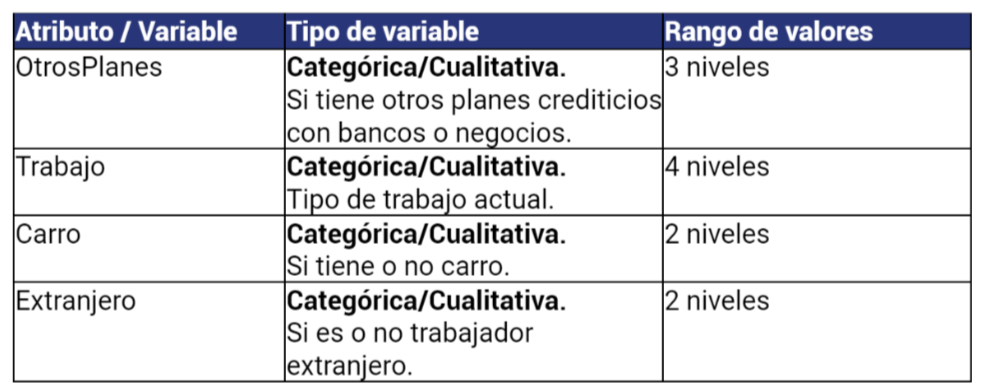

En este caso, las variables categóricas se registraron con valores enteros, por lo que inicialmente se tratarán como numéricas. A partir de los resultados obtenidos, se mejorará el modelo. Dado que los niveles de cada clase son 0 y 1, se puede obtener el total de registros sumando los valores de la columna correspondiente.


In [2]:
sum(germandata['AsignarCredito'])

300

Puedes inferir con la información que te arrojan estos datos, que de los 1,000 registros que tienes, 300 son de la clase de crédito de riesgo y 700 de la clase de crédito no riesgoso.

## 1.2 - El impacto del manejo de las bases de datos

### Extracción de información

Retomemos el ejemplo de la solicitud de crédito, en el que hicimos una inspección general de los datos. Existe gran potencial de información latente en los datos originales. Tu tarea será saber cómo organizarlos para extraer dicha información.

La primera etapa de la técnica del aprendizaje supervisado consiste en identificar los conjuntos de las variables de entrada y la variable de salida.

In [3]:
X = germandata[['duracion','historial','proposito','monto','ahorros','edocivil','edad',
            'otroscreditos','casa','otrosplanes','trabajo','carro','extranjero']]
Y = germandata['AsignarCredito']

X = X.values
Y = Y.values

print(X)

[[18  4  2 ...  3  1  1]
 [ 9  4  0 ...  3  1  1]
 [12  2  9 ...  2  1  1]
 ...
 [21  4  0 ...  4  2  1]
 [12  2  3 ...  4  2  1]
 [30  2  2 ...  3  1  1]]


Para este caso particular usaremos un **70% para el conjunto de entrenamiento, un 15% para el conjunto de validación y el 15% restante para el conjunto de prueba.**
Mediante los comandos de la librería de scikit-learn puedes obtener estos porcentajes como se muestra a continuación:

In [4]:
from sklearn.model_selection import train_test_split

x_train_validation, x_test, y_train_validation, y_test = \
train_test_split(X, Y, test_size=0.15)

x_train, x_validation, y_train, y_validation = \
train_test_split(x_train_validation, y_train_validation, test_size=0.176)

La primera partición genera el conjunto de prueba con un 15% de los datos. Es importante recalcar que este conjunto de prueba **ya no deberá tocarse sino hasta al final, cuando se desee obtener el desempeño final del modelo.** 

Con 850 de los registros restantes generas el conjunto de entrenamiento y validación. En particular, si deseas obtener un conjunto de validación con 150 registros, entonces el valor de porcentaje en la segunda partición debe ser:

$$150/850≈0.176150/850≈0.176$$

> **Recuerda que:** 

1. Los datos del conjunto de entrenamiento se utilizan para obtener los pesos del modelo de clasificación de una manera supervisada.

2. Los datos del conjunto de validación los estarás usando para comprobar qué tan bien se está comportando tu modelo cuando haces modificaciones o ajustes a los hiperparámetros del modelo.

3. Y finalmente el conjunto de prueba lo usarás para obtener el desempeño final del modelo.

Verifica la dimensión de cada uno de los tres conjuntos generados:

In [5]:
print( "Dimensión X_train_set:\t\t", x_train.shape)
print( "Dimensión X_validation_set:\t", x_validation.shape)
print ("Dimension X_test_set:\t\t", x_test.shape)
print("\nDimensión Y_train:\t\t", y_train.shape)
print ("Dimensión Y_validation:\t\t", y_validation.shape)
print ("Dimensión Y_test:\t\t", y_test.shape)

Dimensión X_train_set:		 (700, 13)
Dimensión X_validation_set:	 (150, 13)
Dimension X_test_set:		 (150, 13)

Dimensión Y_train:		 (700,)
Dimensión Y_validation:		 (150,)
Dimensión Y_test:		 (150,)


Tu objetivo es predecir si una solicitud de crédito es o no considerada riesgosa. Es decir, te encuentras con un problema de clasificación binaria, donde 0 significa solicitante no riesgoso y 1 significa solicitante riesgoso. 

Aplica uno de los principales modelos en problemas de clasificación binaria, a saber, el modelo de **Regresión Logística.**

In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=1000)
modelo_RL = clf.fit(x_train, y_train)

print(
    "Precisión del modelo de regresión logística: ",
    modelo_RL.score(x_validation, y_validation),
)

Precisión del modelo de regresión logística:  0.78


### Actividad Adicional

Puedes volver a ejecutar los siguientes pasos:

1. **Partición de datos**: Divide el conjunto en **entrenamiento** y **validación**, manteniendo intacto el conjunto de **prueba**.
2. **Ajuste del modelo**: Entrena el modelo con el conjunto de entrenamiento y ajusta sus hiperparámetros usando el conjunto de validación.
3. **Evaluación de exactitud**: Calcula el porcentaje de exactitud utilizando el conjunto de validación.

Para reducir la variabilidad en los resultados, repite estos pasos **10 veces** y calcula el **promedio** y la **desviación estándar** de la exactitud obtenida en el conjunto de validación.

Recuerda que el conjunto de **prueba** debe permanecer sin modificaciones hasta la evaluación final.

In [7]:
import numpy as np

exactitud = []

for k in range(1, 10):
    x_train, x_validation, y_train, y_validation = train_test_split(
        x_train_validation, y_train_validation, test_size=0.176
    )

    clf = LogisticRegression(C=1.0, solver="newton-cg", max_iter=5000)
    modelo_RL = clf.fit(x_train, y_train)
    exactitud.append(modelo_RL.score(x_validation, y_validation))

print("Precicion promdio:", np.mean(exactitud))
print("Desviación estandar:", np.std(exactitud))

Precicion promdio: 0.7222222222222222
Desviación estandar: 0.04320493798938573


Para mejorar los resultados, ajusta los siguientes hiperparámetros del modelo de **regresión logística**:

1. **Porcentaje de partición**: Modifica la distribución entre el conjunto de **entrenamiento** y **validación** para evaluar su impacto en la generalización del modelo.
2. **Constante de regularización inversa \( C \)**: Ajusta el valor de **\( C \)** para controlar la penalización aplicada a los coeficientes del modelo.
3. **Solver**: Experimenta con diferentes algoritmos de optimización (`liblinear`, `lbfgs`, `saga`, etc.) para mejorar la convergencia y estabilidad del modelo.
4. **Número máximo de iteraciones**: Aumenta el número de iteraciones si el modelo no converge correctamente.

Consulta la documentación de **scikit-learn** para explorar otros parámetros y mejorar el ajuste del modelo:  
[Regresión Logística en scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

# L2 - Preparacion de la informacion


En tu labor diaria realizas muchas actividades relacionadas con la carga de bases de datos, tales como:

- Datos de los clientes
- Datos de los empleados de la empresa
- Comentarios de los usuarios en redes sociales
- Comentarios en la página de la empresa

Es necesario que sepas cómo obtener el mayor provecho de todos estos datos para tu mayor beneficio.

## 2.1 - La carga de la base de datos

### 2.1.1 Guardar la informacion

Los datos pueden presentarse en distintos formatos, siendo uno de los más comunes el **CSV** (valores separados por comas). Este formato es ampliamente utilizado para almacenar y transferir datos estructurados.

Ya has trabajado previamente con este formato, por lo que ahora revisarás los pasos necesarios para guardar y leer información en **CSV**.

In [8]:
import pandas as pd

A = ["Luis", "Diana", "Laura"]
B = [21, 18, 27]
C = ["Licenciado", "Dentista", "Abogado"]

Diccionario = {"Nombre": A, "Edad": B, "Profesion": C}
df = pd.DataFrame(Diccionario)
print(df)
df.to_csv("datos1.csv")

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


En lugar de utilizar comas para separar los valores en cada registro, puedes optar por utilizar **tabuladores**. Para lograr esto, debes seguir los siguientes pasos:

In [9]:
df.to_csv("datos2.csv", sep="\t")

También puedes guardar la información **sin el indexado de los registros** y **sin los encabezados de las columnas**. Para ello, utiliza la siguiente instrucción:

In [10]:
df.to_csv("datos3.csv", header=False, index=False)

### 2.1.2 - Recuperar la informacion

Ahora que has aprendido a guardar la información en un archivo CSV, es momento de **recuperarla y cargarla** en una variable dentro de tu proyecto en **Jupyter Notebook**.

Debes realizar este procedimiento cada vez que necesites leer información previamente guardada en archivos CSV, ya sea generados por ti o por terceros.

En el primer ejemplo, aprenderás a leer el archivo **"datos1.csv"**, que contiene:
- Registros separados por comas.
- Nombre de las columnas.
- Índice de cada registro.

Para cargar esta información en tu proyecto, usa la siguiente instrucción:

In [11]:
df1 = pd.read_csv("datos1.csv", index_col=0, header='infer')
print(df1)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


Si los registros fueron guardados utilizando **tabuladores** en lugar de comas, debes especificarlo al leer el archivo. 

En este caso, la información está almacenada en **"datos2.csv"**, por lo que la instrucción adecuada para cargarla será la siguiente:

In [12]:
df2 = pd.read_csv("datos2.csv", sep="\t", index_col=0, header='infer')
print(df2)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


Por último, si necesitas recuperar la información del archivo **"datos3.csv"**, donde:

- Los registros están separados por comas.
- No incluye nombres o encabezados de columnas.
- No incluye el índice de cada registro.

Debes usar la siguiente instrucción para leer correctamente el archivo:

In [13]:
df3 = pd.read_csv("datos3.csv", header=None)
print(df3)

       0   1           2
0   Luis  21  Licenciado
1  Diana  18    Dentista
2  Laura  27     Abogado


En estos casos, si deseas agregar los nombres a las columnas para tener una mejor referencia de los datos, se puede hacer de la forma siguiente:

In [14]:
df3.columns = ["Nombre", "Edad", "Profesion"]
print(df3)

  Nombre  Edad   Profesion
0   Luis    21  Licenciado
1  Diana    18    Dentista
2  Laura    27     Abogado


-- No need to reproduce: df4 = pd.read_excel("datos1.xlsx", index_col=0, header='infer')

### 2.1.3 - Datos perdidos

En tu trabajo como científico de datos, es común recibir información de otros departamentos con **datos faltantes** o **erróneos**. Esto no significa que el archivo esté dañado, sino que algunos registros no contienen todos los valores esperados.

Existen diversas razones por las que la información puede estar incompleta, pero **afortunadamente**, hay funciones que te permitirán manejar esta situación de manera efectiva.

#### Manejo de Registros Perdidos con NumPy

Una forma de gestionar registros perdidos es utilizando la **librería NumPy**. Para ello, primero debes importar la librería e incluir la instrucción `np.nan`, que permite representar valores faltantes en los datos.

Esta técnica se aplica tanto a **datos numéricos** como a **datos categóricos**.

In [15]:
import numpy as np

A =["Luis", "Diana", "Laura"]
B = [21, np.nan, 27]
C = ["Licenciado", "Dentista", "Abogado"]

diccionario = {"Nombre": A, "Edad": B, "Profesion": C}
df5 = pd.DataFrame(diccionario)
print(df5)

  Nombre  Edad   Profesion
0   Luis  21.0  Licenciado
1  Diana   NaN    Dentista
2  Laura  27.0     Abogado


### Identificación de Datos Perdidos en un DataFrame

Al visualizar la información de un **DataFrame** con la función `head()`, los datos faltantes aparecen representados como **NaN** (Not-a-Number).

Cuando el número de filas y columnas en el DataFrame es grande, es necesario utilizar funciones adicionales para detectar y cuantificar los datos faltantes.

Una opción útil es la función info(), que muestra el número total de registros, permitiendo identificar fácilmente qué factores tienen información incompleta.

In [16]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre     3 non-null      object 
 1   Edad       2 non-null      float64
 2   Profesion  3 non-null      object 
dtypes: float64(1), object(2)
memory usage: 204.0+ bytes


Al usar la función `info()`, puedes identificar cuántos valores **no nulos** hay en cada columna del **DataFrame**.

Ejemplo de resultados:

- **Nombre**: 3 registros no nulos.
- **Edad**: 2 registros no nulos.
- **Profesión**: 3 registros no nulos.

Esto indica que **falta un valor en la columna "Edad"**, y esta técnica es útil sin importar la cantidad de registros o variables que tenga el conjunto de datos.

In [17]:
df5.isnull().sum()

Nombre       0
Edad         1
Profesion    0
dtype: int64

#### Opciones para Manejar Datos Perdidos

El problema de los **datos perdidos** no tiene una única solución, y existen diversas estrategias para abordarlo. A continuación, se presentan dos opciones comunes:

1. **Eliminación de registros con datos perdidos**  
   - Se descartan las filas donde aparecen valores faltantes.
   - Útil cuando la cantidad de datos perdidos es pequeña y no afecta significativamente el análisis.

2. **Sustitución de valores faltantes**  
   - Se reemplazan los datos perdidos utilizando un criterio específico, como:
     - Media o mediana (para datos numéricos).
     - Valor más frecuente (para datos categóricos).
     - Un valor específico como "Desconocido" o "N/A".

La elección de la estrategia dependerá del contexto y la naturaleza de los datos.

#### Sustitución de Datos Perdidos con el Promedio

En el ejemplo ilustrado, el dato perdido corresponde a la variable **Edad**, que es un valor **numérico**. 

Una forma de completar la información es reemplazar el valor faltante con el **promedio** de las edades restantes. En este caso, el valor promedio es **24**.

Para realizar esta sustitución, puedes usar la siguiente función:

In [18]:
df5["Edad"] = df5["Edad"].fillna(df5["Edad"].mean())
print(df5)  

  Nombre  Edad   Profesion
0   Luis  21.0  Licenciado
1  Diana  24.0    Dentista
2  Laura  27.0     Abogado


## 2.2 - El preprocesamiento de la base de datos

El **preprocesamiento** es una etapa crucial en la **minería de datos**, ya que permite extraer información útil a partir de un conjunto de datos.

Antes de aplicar modelos o análisis, los datos deben ser preparados adecuadamente. Este proceso puede incluir:

- **Normalización**: Ajustar los valores de las variables a una escala común para mejorar la precisión del modelo.
- **Transformaciones**: Modificaciones en los datos para reducir sesgos en su distribución y mejorar la calidad del análisis.

Estas técnicas aseguran que los datos sean más representativos y adecuados para su procesamiento.

### 2.2.1 - Preprocesamiento

Las transformaciones en los datos pueden mejorar la **convergencia** durante el entrenamiento de modelos de **aprendizaje de máquina**, asegurando un mejor desempeño.

En general, las variables en un modelo se clasifican en dos tipos:

1. **Variables independientes (variables de entrada)**  
   - Son las características que se utilizan para hacer predicciones.
   - Pueden requerir transformaciones como normalización o estandarización para mejorar la estabilidad del modelo.

2. **Variable dependiente (variable de salida)**  
   - Es el valor que el modelo intenta predecir.
   - Dependiendo del tipo de dato, puede requerir transformación (como logaritmos para escalas sesgadas o categorización en problemas de clasificación).
Las transformaciones a aplicar dependerán de la naturaleza de cada tipo de variable.


#### Verificación de la Distribución de la Variable de Salida

Cuando la **variable de salida** es un dato numérico de valor real, es recomendable verificar que su distribución sea aproximadamente **acampanada** (normal). 

Esta característica es requerida por varios modelos, como la **regresión logística**, ya que asumen que los datos siguen una distribución normal.

Para comprobar la forma de la distribución, puedes utilizar **histogramas**, los cuales permiten visualizar la dispersión y tendencia de los datos, facilitando la identificación de sesgos o anomalías.

#### Distribución Gaussiana y Curvas Unimodales

La distribución **gaussiana**, también conocida como **normal**, se caracteriza por ser **simétrica** respecto a un **pico máximo** en la curva. Cuando una distribución presenta un único pico, se denomina **unimodal**.

Sin embargo, no todas las distribuciones unimodales son gaussianas. Existen dos casos principales de curvas unimodales **no gaussianas**:

1. **Sesgo positivo (skewed right)**  
   - La cola de la distribución se extiende hacia la derecha.
   - Indica que hay valores atípicos grandes que afectan la media.

2. **Sesgo negativo (skewed left)**  
   - La cola de la distribución se extiende hacia la izquierda.
   - Indica que los valores pequeños afectan la media.

Identificar el tipo de distribución es crucial para aplicar técnicas de normalización y mejorar el rendimiento de los modelos de aprendizaje automático.

#### Transformación Logística



In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mypath = "california_total_bedrooms.csv"
dataset = pd.read_csv(mypath)
print(dataset.head())
print(dataset.info())

   total_bedrooms
0             661
1             310
2             507
3              15
4             244
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_bedrooms  3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
None


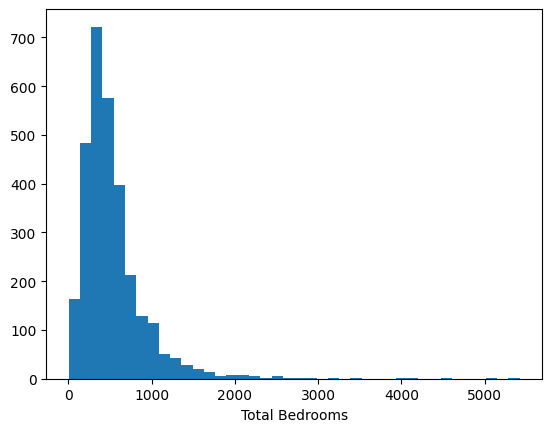

In [20]:
total_bedrooms = np.array(dataset['total_bedrooms'])

plt.hist(total_bedrooms, bins=40)
plt.xlabel("Total Bedrooms")
plt.show()

Las transformaciones logarítmicas reducen el sesgo en distribuciones, acercándolas a una forma normal. Se utiliza `np.log()` en Python, incrementando el valor en 1 para evitar valores negativos, especialmente en casos con sesgo positivo como el número de habitaciones por zona.


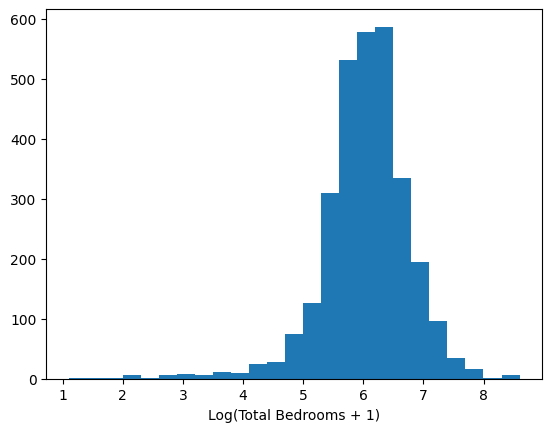

In [21]:
def fun1(x):
    return np.log(x + 1)

plt.hist(fun1(total_bedrooms), bins=25)
plt.xlabel("Log(Total Bedrooms + 1)")
plt.show()

Este ejercicio mostró cómo ajustar una distribución con sesgo positivo. Para un sesgo negativo, puedes aplicar una corrección similar reflejando los datos respecto al eje vertical.


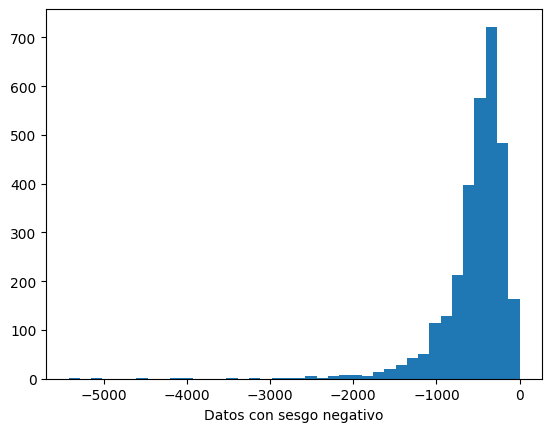

In [22]:
x2 = (-1.0) * total_bedrooms

plt.hist(x2,bins=40)
plt.xlabel("Datos con sesgo negativo")
plt.show()

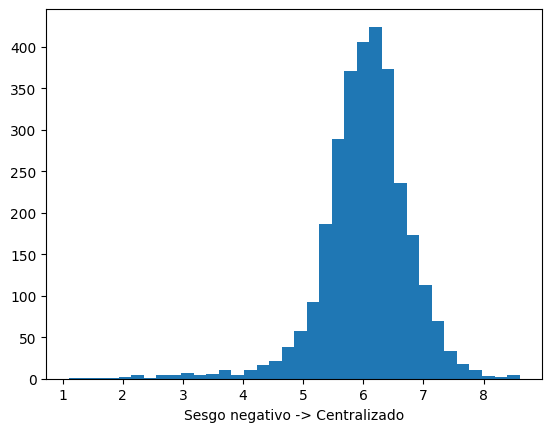

In [23]:
x2new = np.log(1 - x2)

plt.hist(x2new, bins=36)
plt.xlabel("Sesgo negativo -> Centralizado")
plt.show()

Para datos con sesgo positivo, se pueden aplicar transformaciones como logaritmos (𝑙𝑜𝑔(𝑀+1−𝑥)) o raíces cuadradas. Estas técnicas ayudan a reducir el sesgo y mejorar la distribución.


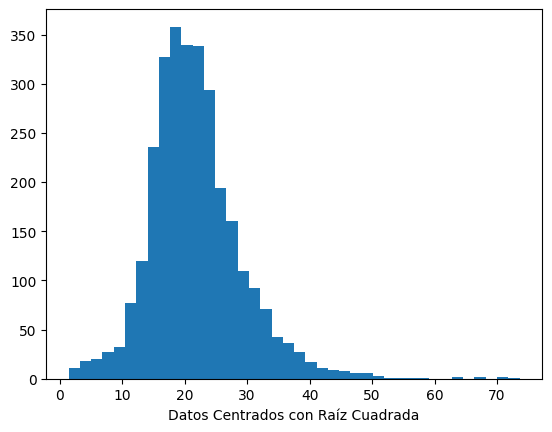

In [24]:
plt.hist(np.sqrt(total_bedrooms), bins=40)
plt.xlabel("Datos Centrados con Raíz Cuadrada")
plt.show()


O bien, usando potencias fraccionarias también se pueden obtener distribuciones aproximadamente acampanadas.

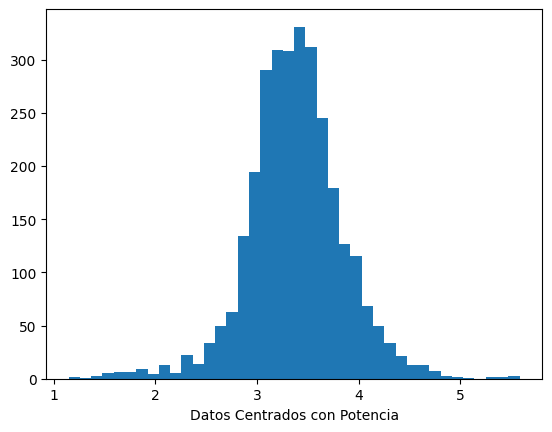

In [25]:
plt.hist(np.power(total_bedrooms, 0.2), bins=40)
plt.xlabel('Datos Centrados con Potencia')
plt.show()

##### Kurtosis: Qué es y cómo interpretarla

La **kurtosis** es una medida estadística que describe la forma de la **curva de una distribución**, específicamente qué tan concentrada está la masa de datos en el centro y qué tan pesadas son sus colas.

Tipos de kurtosis:
- **Leptocúrtica (kurtosis > 3)**: Pico alto y delgado; colas pesadas, mayor presencia de outliers.
- **Mesocúrtica (kurtosis ≈ 3)**: Distribución normal; ni colas pesadas ni pico muy agudo.
- **Platicúrtica (kurtosis < 3)**: Pico bajo y plano; colas ligeras, pocos valores extremos.

¿Para qué se usa?
- Detectar outliers y colas pesadas.
- Evaluar normalidad antes de aplicar modelos sensibles (regresión, PCA).
- Decidir si es necesaria una transformación para estabilizar la distribución (log, raíz, etc.).

En Python:
```python
from scipy.stats import kurtosis

kurtosis(array, fisher=False)  # Fisher=False para que normal = 3

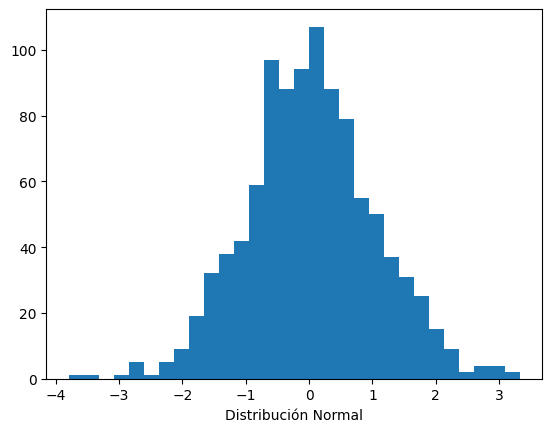

3.313890789130915


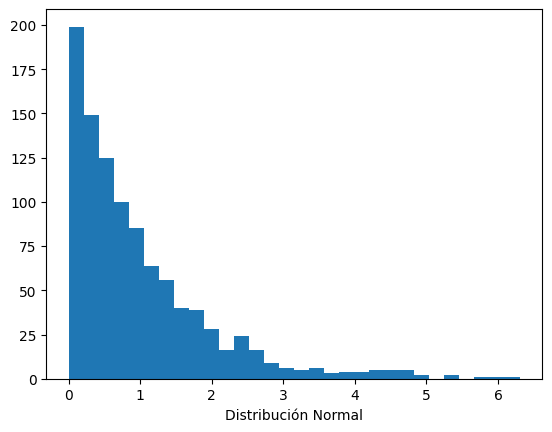

7.40493190373904


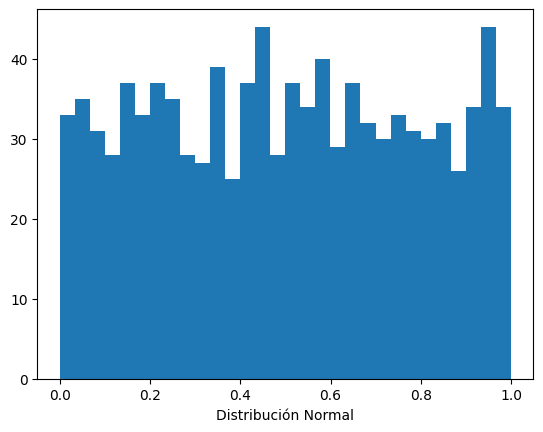

1.8248623260991683


In [26]:
from scipy.stats import kurtosis as krt

normal = np.random.normal(loc=0, scale=1, size=1000)
normal_kurt = krt(normal, fisher=False)

exp = np.random.exponential(scale=1, size=1000)
exp_krt = krt(exp, fisher=False)

plane = np.random.uniform(size=1000)
plane_krt = krt(plane,fisher=False)

def plot_dist(array, krt_val):
    plt.hist(array, bins=30)
    plt.xlabel("Distribución Normal")
    plt.show()
    print(krt_val)

plot_dist(normal, normal_kurt)
plot_dist(exp,exp_krt)
plot_dist(plane,plane_krt)

#### Estandarización

La **normalización** o **escalamiento** ajusta variables numéricas a un rango común, mejorando la comparación y análisis. 

- **Estandarización**:  
    $$Z = \frac{X - \bar{X}}{s}$$  
    Donde $\bar{X}$ es la media y $s$ la desviación estándar. Los datos quedan en un rango aproximado de $[-5, +5]$.

- **Normalización Min-Max**:  
    $$X' = \frac{X - \text{min}}{\text{max} - \text{min}}$$  
    Ajusta los datos a un rango de $[0, 1]$.

Ambas técnicas son esenciales para mejorar la estabilidad y desempeño de los modelos.

Estas transformaciones no alteran la forma de la distribución, sino que la centran cerca del origen.

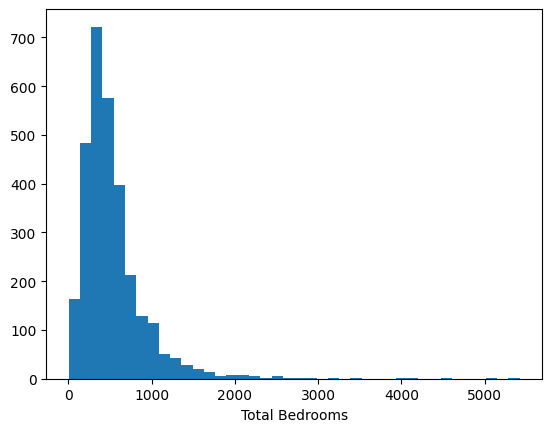

In [27]:
plt.hist(total_bedrooms, bins=40)
plt.xlabel("Total Bedrooms")
plt.show()

Inicia por definir la transformación de normalización apoyándote de las funciones de Python para obtener el valor promedio y la desviación estándar de los datos:

Normalización

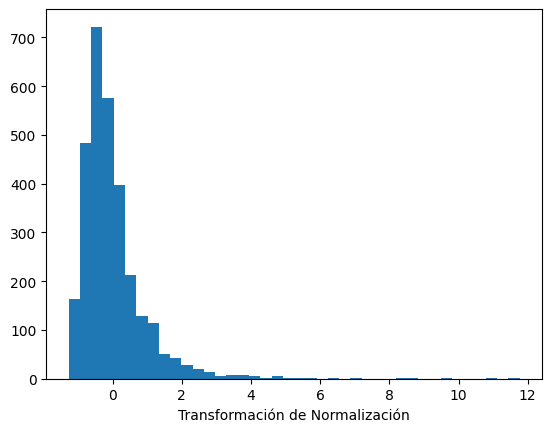

In [28]:
def fun2(x):
    return (x - np.mean(x))/np.std(x)

plt.hist(fun2(total_bedrooms), bins=40)
plt.xlabel("Transformación de Normalización")
plt.show()


Al aplicar la transformación puedes ver que la forma de la distribución y forma de la gráfica es básicamente la misma, pero el rango se encuentra ahora alrededor del 0, donde el valor máximo ahora es un poco mayor a 10, a diferencia de los datos originales donde este valor es mayor a 5000. 


Escalamineto entre 0 y 1

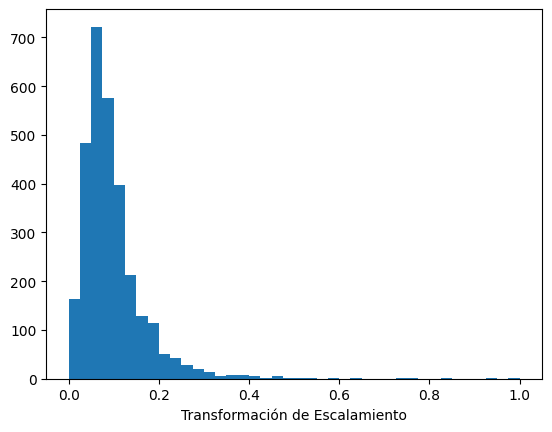

In [29]:
def fun3(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

plt.hist(fun3(total_bedrooms), bins=40)
plt.xlabel("Transformación de Escalamiento")
plt.show()

### Técnicas de Transformación de Escala y Distribución

Las técnicas de transformación de escala y distribución son fundamentales en el preprocesamiento de datos, ya que permiten mejorar la calidad de los datos y optimizar el desempeño de los modelos de aprendizaje automático. A continuación, se destacan dos puntos clave sobre estas transformaciones:

- **Transformación para Mejorar la Forma de la Distribución**:  
    Esta técnica se utiliza para ajustar la forma de la distribución de los datos, haciéndola más simétrica o cercana a una distribución normal. Esto facilita la identificación de relaciones lineales entre las variables y reduce el impacto de valores atípicos (outliers) en el análisis. Ejemplos comunes incluyen transformaciones logarítmicas, raíces cuadradas y potencias fraccionarias.

- **Transformación para Estandarizar la Magnitud de las Variables**:  
    La estandarización o normalización de las variables asegura que todas las características tengan una magnitud comparable, evitando que una variable con valores más grandes domine el modelo. Esto es especialmente importante en algoritmos sensibles a la escala, como regresión logística o redes neuronales. Técnicas como la estandarización (Z-score) y el escalamiento Min-Max son ampliamente utilizadas para este propósito.

Ambas transformaciones son esenciales para garantizar que los datos sean adecuados para el análisis y que los modelos puedan aprender de manera efectiva.

# L3 - Los Modelos de Aprendizaje Supervisado

## 3.1 Identificación del tipo de aprendizaje 

Dentro del aprendizaje supervisado existen dos tipos principales de modelos:

1. **Modelos de regresión**: Se utilizan cuando la variable de salida es numérica.
2. **Modelos de clasificación**: Se aplican cuando la variable de salida es categórica.

La naturaleza de las variables de entrada no afecta el tipo de modelo; solo la variable de salida lo define. Es posible transformar un problema de regresión en uno de clasificación mediante la discretización de la variable de salida, asegurando que cada intervalo contenga al menos el 10% de los datos para representatividad.

Como científico de datos, debes tomar decisiones fundamentadas y considerar el impacto de estas transformaciones en el análisis y las conclusiones.


Caso Titanic

Ahora trabajarás con los datos del Titanic, que incluyen información de 891 pasajeros. Para este ejemplo, se analizarán únicamente las edades de los pasajeros utilizando la librería Seaborn. Los datos están disponibles en los archivos adjuntos de la plataforma.


In [30]:
import seaborn as sns
import pandas as ps

data = sns.load_dataset('titanic')
edad = data['age']
pd.DataFrame(edad).head(7)

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0


In [31]:
df_edad = pd.DataFrame(edad.dropna(axis=0, inplace=False)).reset_index(drop=True)
df_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


Proceso de Discretización

Observa que la información de dicha variable te está indicando que el tipo de datos de la edad son números reales de tipo flotante. Procede ahora a discretizar esta variable. Para ello obtengamos el rango entre el cual varían las edades de los pasajeros: 

In [32]:
print(min(edad))
print(max(edad))

0.42
80.0


In [33]:
th = [0, 18, 30, 90]

df_edad['age-d'] = pd.cut(df_edad['age'], bins=th, right=False)
df_edad.head(9)

,age,age-d
0,22.0,"[18, 30)"
1,38.0,"[30, 90)"
2,26.0,"[18, 30)"
3,35.0,"[30, 90)"
4,35.0,"[30, 90)"
5,54.0,"[30, 90)"
6,2.0,"[0, 18)"
7,27.0,"[18, 30)"
8,14.0,"[0, 18)"


##### ℹ️ Notación de Intervalos en pandas (`pd.cut`)

Cuando discretizamos datos con `pd.cut`, los intervalos se muestran con notación matemática:

- `[a, b)` significa: "desde **a** (incluido) hasta **b** (no incluido)"
- `(` y `]` indican que el extremo **no está incluido**
- `[` y `]` indican que el extremo **sí está incluido**

Ejemplo:  
`[30, 90)` = valores entre 30 y 89.999...

Esta notación no representa una lista ni un diccionario, sino un **rango de valores** donde cae el dato.

De la información de la nueva variable discretizada que llamamos “age-d” observa que ya se indica que dichos datos son categóricos,.

In [34]:
df_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     714 non-null    float64 
 1   age-d   714 non-null    category
dtypes: category(1), float64(1)
memory usage: 6.6 KB


Por último, verifica que cada una de estas tres clases tiene al menos el 10% de los datos.

In [35]:
100 * (df_edad['age-d'].value_counts()/df_edad.shape[0])

age-d
[30, 90)    46.218487
[18, 30)    37.955182
[0, 18)     15.826331
Name: count, dtype: float64

## 3.2 - Los modelos de aprendizaje supervisado

El modelo de regresión logística es fundamental en el aprendizaje supervisado, especialmente para problemas de clasificación binaria.


### 3.2.1 - Análisis Descriptivo

Antes de querer empezar a aplicar tu primer modelo, haz un análisis descriptivo muy breve que te permita conocer un poco los datos.
 
Iniciarás cargando y desplegando con Pandas la información de las variables:

In [36]:
germandata = pd.read_csv('GermanCredit.csv')
germandata.head(10)

,AsignarCredito,duracion,historial,proposito,monto,ahorros,edocivil,edad,otroscreditos,casa,otrosplanes,trabajo,carro,extranjero
0,0,18,4,2,1049,1,2,21,3,1,1,3,1,1
1,0,9,4,0,2799,1,3,36,3,1,2,3,1,1
2,0,12,2,9,841,2,2,23,3,1,1,2,1,1
3,0,12,4,0,2122,1,3,39,3,1,2,2,1,2
4,0,12,4,0,2171,1,3,38,1,2,2,2,1,2
5,0,10,4,0,2241,1,3,48,3,1,2,2,1,2
6,0,8,4,0,3398,1,3,39,3,2,2,2,1,2
7,0,6,4,0,1361,1,3,40,3,2,1,2,1,2
8,0,18,4,3,1098,1,2,65,3,2,2,1,1,1
9,0,24,2,3,3758,3,2,23,3,1,1,1,1,1


Tienes 14 variables en total:

- **Variable objetivo (AsignarCredito)**: 
    - Toma dos valores: 
        - `1`: Se asigna el crédito.
        - `0`: No se asigna el crédito.

- **Variables predictoras (13)**: 
    - Son las variables de entrada que determinan si se asignará el crédito.
    - Todas están codificadas numéricamente.


In [37]:
germandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   AsignarCredito  1000 non-null   int64
 1   duracion        1000 non-null   int64
 2   historial       1000 non-null   int64
 3   proposito       1000 non-null   int64
 4   monto           1000 non-null   int64
 5   ahorros         1000 non-null   int64
 6   edocivil        1000 non-null   int64
 7   edad            1000 non-null   int64
 8   otroscreditos   1000 non-null   int64
 9   casa            1000 non-null   int64
 10  otrosplanes     1000 non-null   int64
 11  trabajo         1000 non-null   int64
 12  carro           1000 non-null   int64
 13  extranjero      1000 non-null   int64
dtypes: int64(14)
memory usage: 109.5 KB


Es crucial identificar las variables numéricas y categóricas para aplicar transformaciones adecuadas. 

- **Regla empírica**: Variables con menos de 20 valores únicos se consideran categóricas; de lo contrario, son continuas.
- **Clasificación**:
    - **Numéricas**: Duración, monto, edad.
    - **Categóricas**: Las otras cuatro variables.


In [38]:
germandata.nunique().sort_values(ascending=False)

monto             923
edad               53
duracion           33
proposito          10
historial           5
ahorros             5
edocivil            4
otrosplanes         4
trabajo             4
otroscreditos       3
casa                3
AsignarCredito      2
carro               2
extranjero          2
dtype: int64

De los 1000 registros en la base de datos:

- **700** clientes recibieron autorización de crédito (`AsignarCredito=0`).
- **300** clientes no recibieron autorización (`AsignarCredito=1`).

Esto indica que hay suficientes datos en cada nivel de la variable objetivo para entrenar modelos de aprendizaje automático.


In [39]:
aprobados = sum(germandata['AsignarCredito']==0)
rechazados = sum(germandata['AsignarCredito']==1)

print(f"Total de Creditos Aprobados: {aprobados}")
print(f"Total de Creditos Rechazados: {rechazados}")

Total de Creditos Aprobados: 700
Total de Creditos Rechazados: 300


El modelo más sencillo para este problema es autorizar siempre el crédito, logrando un 70% de exactitud. El objetivo es encontrar un modelo de aprendizaje automático que supere este porcentaje utilizando las variables de entrada disponibles.

Para ello:
- Define **X** como la matriz de variables de entrada.
- Define **Y** como la variable de salida (clasificación binaria).

Ambas deben contener únicamente valores numéricos para aplicar los modelos matemáticos correspondientes.

In [40]:
germandata.columns

Index(['AsignarCredito', 'duracion', 'historial', 'proposito', 'monto',
       'ahorros', 'edocivil', 'edad', 'otroscreditos', 'casa', 'otrosplanes',
       'trabajo', 'carro', 'extranjero'],
      dtype='object')

In [41]:
x = germandata[
    [
        "duracion",
        "historial",
        "proposito",
        "monto",
        "ahorros",
        "edocivil",
        "edad",
        "otroscreditos",
        "casa",
        "otrosplanes",
        "trabajo",
        "carro",
        "extranjero"
    ]
]

y = germandata['AsignarCredito']

x = x.values
y = y.values

Para dividir los datos en conjuntos de entrenamiento (80%), validación (10%) y prueba (10%), utiliza la función `train_test_split` de Scikit-learn en dos fases. Esto permite obtener los tres conjuntos necesarios para el análisis.


In [42]:
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(
    x, y, train_size=0.80
)
x_validation, x_test, y_validation, y_test = train_test_split(
    x_validation_and_test, y_validation_and_test, train_size=0.50
)

El porcentaje asignado a los conjuntos de entrenamiento, validación y prueba es una decisión clave en ciencia de datos. 

- **Regla general**: 
    - Entrenamiento: al menos 50% de los datos, ya que requiere más información para ajustar el modelo.
    - Validación y prueba: se dividen los datos restantes, con el conjunto de validación a veces mayor.

- **Recomendación**: Probar diferentes particiones para determinar la que ofrece mejores resultados.


### 3.2.2 - Regresión Logística

Usarás el método de optimización `newton-cg` con el parámetro de regularización `C=1.0`. Un valor menor de `C` incrementa la regularización, ayudando a evitar el sobreentrenamiento. Recuerda entrenar el modelo utilizando el conjunto de entrenamiento (`train_set`).


In [43]:
clf = LogisticRegression(C=1.0, solver='newton-cg')
modelo_RL = clf.fit(x_train, y_train)

Obtén ahora la exactitud (accuracy) para tu modelo supervisado de regresión logística con los datos de validación (validation_set). 

In [44]:
print("Regresión Logística: \n Exactitud (accuracy) con el conjunto de calidación = ", \
    modelo_RL.score(x_validation, y_validation))

Regresión Logística: 
 Exactitud (accuracy) con el conjunto de calidación =  0.77


Finalmente, puedes extraer su matriz de confusión para tener un mayor detalle de la manera en que realiza sus predicciones correctas y las erróneas. 

In [45]:
from sklearn.metrics import confusion_matrix

pr = modelo_RL.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[70,  5],
       [18,  7]])

La partición aleatoria de datos puede generar resultados diferentes en cada ejecución. Mantener la misma partición asegura consistencia en los resultados del modelo de regresión logística. Cambiar la partición o generar una nueva aleatoria producirá resultados distintos.

El modelo de regresión logística utiliza la función \( h_W(W) = \frac{1}{1 + e^{-W^T X}} \), que mapea valores reales a probabilidades entre 0 y 1. En problemas de clasificación binaria, un umbral de 0.5 clasifica valores como positivos o negativos. La gráfica de la función logística muestra su rango entre 0 y 1, permitiendo interpretaciones probabilísticas.

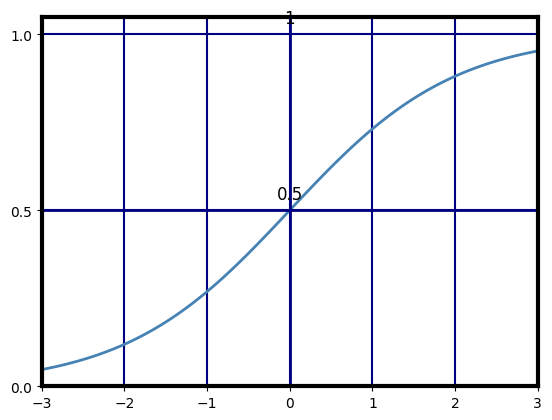

In [46]:
import numpy as np
import matplotlib.pyplot as plt


# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Valores del eje x
x = np.linspace(-3, 3, 100)
y = sigmoid(x)

# Crear la figura
fig, ax = plt.subplots()

# Graficar la curva sigmoide
ax.plot(x, y, color="steelblue", linewidth=2)

# Líneas del marco negro
for spine in ax.spines.values():
    spine.set_linewidth(3)
    spine.set_color("black")

# Ticks y ejes
ax.axhline(0.5, color="navy", linewidth=2)
ax.axvline(0, color="navy", linewidth=2)

# Límites
ax.set_xlim(-3, 3)
ax.set_ylim(0, 1.05)

# Grid personalizado
ax.set_xticks(np.arange(-3, 4, 1))
ax.set_yticks([0, 0.5, 1])
ax.grid(True, color="navy", linewidth=1.5)

# Etiquetas de referencia
ax.text(0, 0.52, "0.5", ha="center", va="bottom", fontsize=12)
ax.text(0, 1.02, "1", ha="center", va="bottom", fontsize=12)

plt.show()

### 3.2.3 - Redes Neuronales

##### Red Neuronal en Problemas de Clasificación

El modelo de red neuronal artificial se basa en el concepto del "perceptrón simple", inspirado en la neurona biológica. Aunque toma como referencia este modelo, no busca replicarlo de manera exacta. Es ampliamente utilizado en problemas de clasificación.


##### Ejemplo de Perceptrón Simple

El perceptrón simple es un algoritmo de clasificación binaria que predice una clase (0 o 1) a partir de entradas numéricas. Simula una neurona biológica: recibe señales (entradas), las pondera, las suma y decide si "dispara" o no (salida).


In [47]:
import numpy as np

# Datos: OR lógico
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Pesos y bias iniciales
w = np.zeros(X.shape[1])
b = 0
lr = 0.1

# Entrenamiento
for epoch in range(10):
    for xi, yi in zip(X, y):
        z = np.dot(xi, w) + b
        y_pred = 1 if z >= 0 else 0
        w += lr * (yi - y_pred) * xi
        b += lr * (yi - y_pred)

print(f"Pesos aprendidos: {w}, bias: {b}")

Pesos aprendidos: [0.1 0.1], bias: -0.1


Cada neurona en una red neuronal recibe entradas ponderadas por pesos \( W \), las combina linealmente y aplica una función de activación para introducir no linealidad, permitiendo modelar problemas complejos.


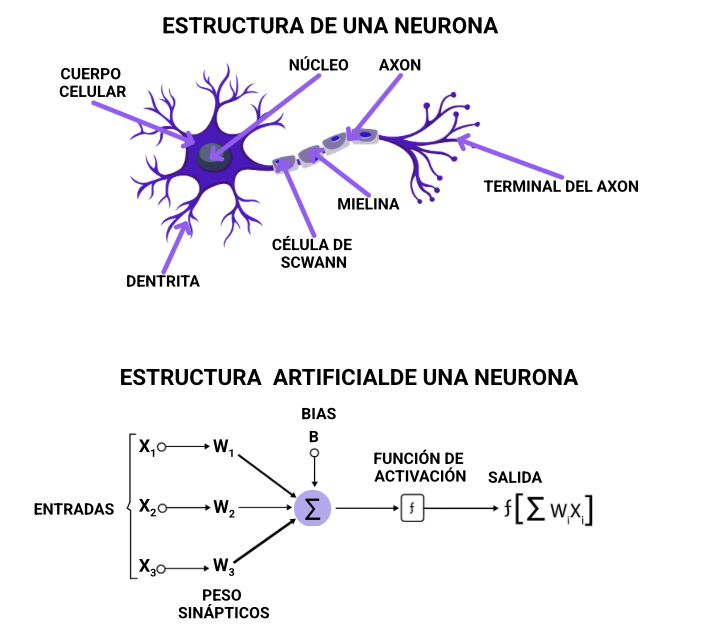

Al igual que en los modelos de una red neuronal biológica, el poder de la red neuronal artificial se basa en la conjunción de varias neuronas simples arregladas en lo que se llaman capas ocultas.  


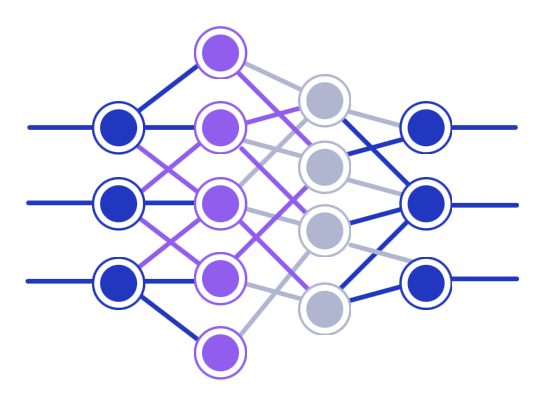

La arquitectura de una red neuronal artificial incluye:

- **Capa de entrada**: Representa el vector de datos de entrada.
- **Capas ocultas**: Basadas en el modelo del perceptrón.
- **Capa de salida**: Representa el vector de salida.

Tipos de modelos según la salida:
- **Regresión**: Valores reales continuos.
- **Clasificación**: Valores binarios o discretos.

Esta arquitectura se denomina **Perceptrón Multicapa (MLP)**, por sus siglas en inglés: *Multilayer Perceptron*.


Ejemplo ilustrativo para implementar una red neuronal con 15 y 4 neuronas en la primera y segunda capas ocultas, respectivamente. 

- **Reglas empíricas**: La cantidad de neuronas y capas ocultas puede definirse entre la suma de neuronas de las capas de entrada y salida, y el doble de estas.
- **Iteraciones máximas**: Se establecen 700 iteraciones para lograr la convergencia del modelo.
- **Proceso**: Definir la arquitectura, entrenar con los datos y realizar predicciones con el conjunto de validación.


In [48]:
from sklearn.neural_network import MLPClassifier

modelo_NN = MLPClassifier(hidden_layer_sizes=(15,4), max_iter=700)
modelo_NN.fit(x_train, y_train)

print(modelo_NN.score(x_validation, y_validation))

0.75


Has obtenido un valor de predicción (accuracy) cercano al 70%, con posibles variaciones debido a la aleatoriedad del proceso. Más adelante se ajustarán los hiperparámetros para mejorar este resultado. Finalmente, se analizarán los resultados por clase utilizando la matriz de confusión.


In [49]:
pr = modelo_NN.predict(x_validation)
confusion_matrix(y_validation, pr)

array([[75,  0],
       [25,  0]])

##### Red Neuronal en Problemas de Regresión

Las redes neuronales también se aplican a problemas de regresión, con una arquitectura similar a la de clasificación, pero con una sola neurona en la capa de salida para predecir valores reales.

En este ejemplo:
- Se generan datos con 1000 puntos, 5 factores de entrada y una salida con ruido gaussiano.
- Los datos se dividen en 60% para entrenamiento y 40% para prueba.
- La red incluye dos capas ocultas (10 y 4 neuronas) y un máximo de 5000 iteraciones.

Si el algoritmo no converge, incrementa el número máximo de iteraciones. Evalúa el modelo con un conjunto de prueba para evitar sobreentrenamiento.


In [50]:
from sklearn.datasets import make_regression

x, y = make_regression(n_samples=1000, n_features=5, n_targets=1, noise=10.0)

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.60)

(1000, 5)
(1000,)


In [51]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

modelo_NNR = MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=5000, random_state=42)
modelo_NNR.fit(x_train, y_train)

pred = modelo_NNR.predict(x_test)

### 3.2.4 - Métricas

Dado que la variable de salida es continua, no es adecuado comparar directamente los valores reales con las predicciones. Por ello, se utilizan métricas específicas para evaluar la calidad de las predicciones del modelo.


##### Error Cuadrático Medio (MSE)

El **error cuadrático medio (ECM)** mide la dispersión promedio al cuadrado entre valores reales y predicciones. Su fórmula es:

$$
\text{MSE} = \frac{1}{n} \sum_{k=1}^{n} (Y_k - \hat{Y}_k)^2
$$

Donde 𝑌𝑘 son los valores reales, 𝑌ˆ𝑘 los valores de predicción y 𝑛 el total de datos del conjunto de prueba.

In [52]:
print(np.square(np.subtract(y_test,pred)).mean())

113.61733762992654


##### Error Porcentual Absoluto Medio (MAPE)

El **Error Porcentual Absoluto Medio** mide el tamaño del error absoluto en términos porcentuales, proporcionando una idea clara del desempeño del modelo. Su fórmula es:

$$
\text{MAPE} = \frac{1}{n} \sum_{k=1}^{n} \left| \frac{Y_k - \hat{Y}_k}{Y_k} \right| \times 100
$$

Donde nuevamente 𝑌𝑘 son los valores reales, 𝑌ˆ𝑘 los valores de predicción y 𝑛 el total de datos del conjunto de prueba.

In [53]:
print(np.mean((abs((y_test - pred) / y_test))) * 100)

21.08876116017175


#### Coeficiente de Correlación de Pearson y Similaridad del Coseno

Estas métricas proporcionan valores normalizados respecto a 1, evaluando la similaridad entre vectores en lugar de medir errores. 

El **coeficiente de correlación de Pearson** se basa en la covarianza y varianzas de las variables, y su fórmula es:

$$
p = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \cdot \text{Var}(Y)}}
$$

Mientras que la **similaridad del coseno** mide el ángulo entre los vectores, indicando qué tan alineados están.


In [54]:
# Coeficiente de Pearson: 
print(np.corrcoef(y_test, pred)[0,1])

# Similaridad del Coseno:
print(np.dot(y_test, pred) / (np.linalg.norm(y_test)* np.linalg.norm(pred)))

0.9967508970165253
0.9967472297739187


# L4 - Uso de los Modelos de Aprendizaje Supervisado

## 4.1 - Manejo de los hiperparámetros de cada modelo


### 4.1.1 - Ajuste de parametros del modelo de Regresión Logística

Los hiperparámetros son parámetros ajustables que impactan el entrenamiento y desempeño de los modelos. Es crucial entender cómo afectan las métricas y errores para proponer mejoras. 

En este caso, se trabajará con un modelo de regresión logística para predecir la supervivencia de pasajeros del Titanic, utilizando la variable `survived` como salida y un conjunto específico de variables como entrada. El objetivo es ajustar los hiperparámetros para optimizar el modelo.


In [55]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
x = titanic[
    [
        "pclass",
        "sex",
        "sibsp",
        "parch",
        "fare",
        "class",
        "who",
        "adult_male",
        "alive",
        "alone",
    ]
]

y = titanic[['survived']]

print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pclass      891 non-null    int64   
 1   sex         891 non-null    object  
 2   sibsp       891 non-null    int64   
 3   parch       891 non-null    int64   
 4   fare        891 non-null    float64 
 5   class       891 non-null    category
 6   who         891 non-null    object  
 7   adult_male  891 non-null    bool    
 8   alive       891 non-null    object  
 9   alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(3), object(3)
memory usage: 51.6+ KB
None


In [57]:
for col in x.columns:
    print(x[col].value_counts())

pclass
3    491
1    216
2    184
Name: count, dtype: int64
sex
male      577
female    314
Name: count, dtype: int64
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
who
man      537
woman    271
child     83
Name: count, dtype: int64
adult_male
True     537
False    354
Name: count, dtype: int64
alive
no     549
yes    342
Name: count, dtype: int64
alone
True     537
False    354
Name: count, dtype: int64


Los datos categóricos pueden representarse de diversas formas, como enteros, texto o valores booleanos. Durante el preprocesamiento, es crucial decidir el tipo de dato para cada variable. 

Para simplificar, transformaremos todas las variables categóricas en enteros, similar a cómo se codificó `pclass` (1, 2, 3). Usaremos `LabelEncoder` y su método `fit_transform` para realizar esta transformación.


In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cols = ["sex", "who", "adult_male", "alone", "class", "alive"]

x[cols] = x[cols].apply(LabelEncoder().fit_transform)

x.head()

/var/folders/mq/2mx6z2xj4d5_y6mdz0gqz5m80000gn/T/ipykernel_7105/2869891508.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[cols] = x[cols].apply(LabelEncoder().fit_transform)


,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,3,1,1,0,7.2500,2,1,1,0,0
1,1,0,1,0,71.2833,0,2,0,1,0
2,3,0,0,0,7.9250,2,2,0,1,1
3,1,0,1,0,53.1000,0,2,0,1,0
4,3,1,0,0,8.0500,2,1,1,0,1


In [59]:
x['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [60]:
y.value_counts()

survived
0           549
1           342
Name: count, dtype: int64

Verificación de Balance de clases

In [61]:
porcentaje_sobrevivientes = 100 * sum(y["survived"]) / y.shape[0]
porcentaje_no_sobrevivientes = 100 * (1 - sum(y["survived"]) / y.shape[0])

print(f"Porcentaje de sobrevivientes: {porcentaje_sobrevivientes:.2f}%")
print(f"Porcentaje de no sobrevivientes: {porcentaje_no_sobrevivientes:.2f}%")

Porcentaje de sobrevivientes: 38.38%
Porcentaje de no sobrevivientes: 61.62%


Existen diversas opiniones sobre el porcentaje a partir del cual se considera que las clases están desbalanceadas. Una regla empírica sugiere que esto ocurre cuando una clase representa el 80% o 90% de los datos. En estos casos, es necesario aplicar técnicas para compensar el desbalance.


Procedamos con la partición del conjunto de datos utilizando Scikit-learn. Se asignará un 60% para entrenamiento y un 40% para prueba. Usaremos `random_state=11` para garantizar reproducibilidad, aunque se puede elegir otro valor de semilla.


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.60, random_state=11
)

print("Dimensión x_train set: \t\t", x_train.shape)
print("Dimensión x_test set: \t\t", x_test.shape)
print("Dimensión y_train set: \t\t", y_train.shape)
print("Dimensión y_test set: \t\t", y_test.shape)

Dimensión x_train set: 		 (534, 10)
Dimensión x_test set: 		 (357, 10)
Dimensión y_train set: 		 (534, 1)
Dimensión y_test set: 		 (357, 1)


In [63]:
x_train.head(7)

,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
115,3,1,0,0,7.9250,2,1,1,0,1
170,1,1,0,0,33.5000,0,1,1,0,1
310,1,0,0,0,83.1583,0,2,0,1,1
666,2,1,0,0,13.0000,1,1,1,0,1
198,3,0,0,0,7.7500,2,2,0,1,1
717,2,0,0,0,10.5000,1,2,0,1,1
695,2,1,0,0,13.5000,1,1,1,0,1


In [64]:
from sklearn.linear_model import LogisticRegression

modelo_RL = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l2',
    random_state=5,
    solver='lbfgs',
    tol=0.0001,
    verbose=0,
    warm_start=False)
modelo_RL.fit(x_train, np.ravel(y_train))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='auto', random_state=5)

El método `fit` de Scikit-learn requiere que el vector de etiquetas sea un arreglo unidimensional, no un vector columna. 

- **Vector columna (`y_train`)**: Dimensión 534x1, primeros valores: 0, 0, 1, 0, 1.
- **Arreglo unidimensional (`np.ravel(y_train)`)**: Dimensión 534, mismos valores.

Ambas representaciones contienen los mismos datos, pero con estructuras diferentes. Es crucial respetar el formato esperado por cada función para evitar errores.


El proceso de entrenamiento con la función `fit` se realiza rápidamente gracias al poder computacional actual, incluso con un conjunto de aproximadamente 500 registros. Ahora, evaluaremos el desempeño del modelo en el conjunto de prueba utilizando la función `score` de Scikit-learn.


In [65]:
modelo_RL.score(x_test, y_test)

1.0

La exactitud se calcula dividiendo las predicciones correctas entre el total de predicciones. Para entenderlo mejor, puedes comparar los primeros valores de las etiquetas reales (`y_test`) con las predicciones obtenidas usando la función `predict` en los primeros 20 registros.


In [66]:
print("Valores-etiquetas reales: %s" % np.ravel(y_test[:20]))
print("Predicciones del modelo: %s" % modelo_RL.predict(x_test)[:20])

Valores-etiquetas reales: [1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1]
Predicciones del modelo: [1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1]


In [67]:
pr = modelo_RL.predict(x_test)
sum(abs(np.ravel(y_test)-pr)/pr.shape[0])

np.float64(0.0)

Explora cómo los cambios en los hiperparámetros afectan el modelo base. Reduce drásticamente el valor máximo de iteraciones (`max_iter`) para observar cómo identificar la falta de convergencia durante el entrenamiento.


In [68]:
modelo_RL_hyper = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    random_state=5,
    max_iter=5
)
modelo_RL_hyper.fit(x_train, np.ravel(y_train))
print("Accuracy: %0.4f\n" % modelo_RL_hyper.score(x_test, y_test))

Accuracy: 0.6331



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


El mensaje de no convergencia indica que el algoritmo no alcanzó un resultado satisfactorio. Es necesario ajustar los hiperparámetros y reentrenar el modelo. La convergencia asegura que el algoritmo terminó, pero no garantiza el mejor resultado posible. Como científico de datos, debes justificar si el resultado es adecuado y validarlo con el equipo de negocios y tomadores de decisiones.


In [69]:
modelo_RL_tmp = LogisticRegression(
    C=0.2, penalty="l2", solver="lbfgs", random_state=17, max_iter=160
)
modelo_RL_tmp.fit(x_train, np.ravel(y_train))
print("Accuracy: %0.4f\n" % modelo_RL_tmp.score(x_test, y_test))

Accuracy: 1.0000



El método `lbfgs` es un optimizador basado en gradiente descendente que optimiza el uso de memoria al calcular segundas derivadas. Otros métodos incluyen:

- **`newton-cg`**: Calcula segundas derivadas exactas, más lento, requiere más iteraciones.
- **`saga`**: Usa gradientes parciales aleatorios, útil para grandes volúmenes de datos.

Los parámetros `C` y `penalty` ayudan a evitar el sobreentrenamiento, donde el modelo memoriza los datos de entrenamiento pero tiene bajo desempeño en validación o prueba.


El desempeño del modelo en validación y prueba suele ser menor que en entrenamiento, ya que el modelo ajusta los pesos con los datos de entrenamiento. Los parámetros `C` y `penalty` ayudan a evitar el sobreentrenamiento:

- **C**: Se busca entre \(10^{-5}\) y \(10^{3}\).
- **penalty**: Opciones:
    - `l2`: Previene sobreentrenamiento con términos cuadráticos.
    - `l1`: Más moderada, usa términos lineales absolutos.
    - `elasticnet`: Combina `l1` y `l2`.
    - `none`: No aplica regularización.

### 4.1.2 - Mejorando el proceso de búsqueda

En el último ajuste de `LogisticRegression`, se usó `C=0.2`, logrando una mejora mínima. Para optimizar aún más, se propone realizar una nueva búsqueda alrededor de este valor, definiendo rangos de parámetros en un diccionario.


Utilizaremos la función `GridSearchCV` de Scikit-learn para realizar una búsqueda exhaustiva de combinaciones de hiperparámetros. Este proceso automatiza la selección de los mejores valores para optimizar el modelo. El resto del flujo, como inicialización, entrenamiento y validación, se mantiene igual.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = [
    {
        "penalty": ["l2"],
        "C": [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
        "solver": ["newton-cg", "lbfgs", "sag"],q
    },
    {"penalty": ["l1"], "C": [0.1, 0.15, 0.18, 0.2], "solver": ["saga"]},
    {
        "penalty": ["elasticnet"],
        "C": [0.1, 0.15, 0.2],
        "l1_ratio": [0.1, 0.5, 0.9],
        "solver": ["saga"],
    },
]

model = LogisticRegression(max_iter=10000)
grid = GridSearchCV(model, param_grid, cv=5, verbose=1)
grid.fit(x_train, np.ravel(y_train))

print("Mejores parámetros:", grid.best_params_)
print("Mejor score cross-val:", grid.best_score_)
print("Score en test:", grid.score(x_test, y_test))

Fitting 5 folds for each of 37 candidates, totalling 185 fits
Mejores parámetros: {'C': 0.15, 'penalty': 'l2', 'solver': 'newton-cg'}
Mejor score cross-val: 1.0
Score en test: 1.0


# L5 - Control del sobreentrenamiento y subentrenamiento


## 5.1 Curvas de Aprendizaje

Has aprendido a implementar y ajustar modelos supervisados. El reto es evitar el sobreentrenamiento, que afecta el desempeño con nuevos datos. Las curvas de aprendizaje ayudan a identificar si el modelo está subentrenado, sobreentrenado o adecuadamente ajustado.

Para ilustrar, se usará una red neuronal de perceptrón multicapa en un problema de clasificación binaria. La arquitectura de la red incluye:

- **Capa de entrada**: Determinada por los datos de entrada.
- **Capas ocultas**: Definidas por el analista (cantidad y neuronas).
- **Capa de salida**: Determinada por la variable de salida.

Aunque existen reglas empíricas para definir la arquitectura, estas solo sirven como punto de partida. En clasificación, la salida está definida por categorías, a diferencia de regresión, donde es un valor real.


## 5.2 Modelos Sub y Sobre Entrenados


### 5.2.1 Modelo Sub-Entrenado

Un modelo está subentrenado (underfitting) cuando es demasiado simple para capturar la complejidad del problema, lo que resulta en un desempeño deficiente. Para abordar este problema, se deben agregar características que permitan modelar mejor los datos.

Ejemplo: Usando Scikit-learn, se simula un problema de clasificación con 1000 registros y 20 predictores en la variable `X`, junto con sus etiquetas correspondientes en `y`.


In [79]:
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=1000,
    n_features=20,
    flip_y=0.2,
    random_state=17
)

print(X.shape, y.shape)

(1000, 20) (1000,)


El parámetro `flip_y` introduce aleatoriedad en los datos para aumentar la dificultad del problema. El parámetro `random_state` asegura la reproducibilidad de los resultados al fijar una semilla para la generación de datos aleatorios.

In [80]:
X[0:2,:]

array([[ 0.30720761,  0.78851574,  1.57775826, -0.83782462, -1.9092439 ,
        -0.52486904, -0.59594565, -1.35986902,  1.10949158, -1.87040312,
         2.0555414 , -0.1644116 ,  0.05467622, -1.00918284, -1.89062424,
         0.27800919,  0.30241122, -0.38344902, -0.57919446, -1.37604018],
       [-1.53627982,  0.12338025,  0.07355866,  0.09005639, -0.58258365,
         0.32100129,  2.6984525 ,  0.31212436,  0.29067048,  1.77439268,
        -1.39129642,  0.22318237,  2.34097438, -1.30102918,  1.07591658,
         0.38101488,  0.3963937 ,  0.87694313,  0.29912412,  2.42462292]])

La función `make_classification` genera 20 factores en `X` con valores pseudoaleatorios distribuidos de forma gaussiana (media 0, desviación estándar 1), aproximadamente entre -3.5 y +3.5. La variable `y` contiene valores binarios (0 y 1), típicos de un problema de clasificación.


In [81]:
y[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

Se utiliza `train_test_split` para dividir los datos en entrenamiento (60%) y prueba (40%), garantizando reproducibilidad con una semilla. Las curvas de aprendizaje evalúan cómo la exactitud y el error evolucionan al aumentar la complejidad del modelo, ayudando a evitar sobreentrenamiento.

Se entrena una red neuronal con dos capas ocultas, incrementando el número de neuronas por iteración para analizar el aprendizaje y generalización. El parámetro `alpha` regula la penalización L2:

- **Alpha alto**: Subentrenamiento (pesos pequeños).
- **Alpha bajo**: Riesgo de sobreentrenamiento (pesos grandes).

Se usa un valor alto de `alpha` para ilustrar subentrenamiento, destacando la importancia de encontrar un equilibrio adecuado.


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.6,
    random_state = 11
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

neuronas = [i for i in range(1, 50, 5)]
print(neuronas)

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:
    model = MLPClassifier(
        hidden_layer_sizes=(i,i),
        max_iter=3000,
        alpha=50,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Predicciones y métricas con el conjunto de entrenamiento:
    train_yhat = model.predict(X_train)

    train_loss = np.mean(abs(y_train - train_yhat))
    train_errors.append(train_loss)

    train_acc = 1 - train_loss
    train_scores.append(train_acc)

    # Predicciones y métricas con el conjunto de prueba:
    test_yhat = model.predict(X_test)

    test_loss = np.mean(abs(y_test - test_yhat))
    test_errors.append(test_loss)

    test_acc = 1 - test_loss
    test_scores.append(test_acc)

    # Evolución de las métricas durante el enterenamoento:
    print('> %d... \t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f'%(i, train_acc, test_acc, train_loss, test_loss))

(600, 20) (400, 20) (600,) (400,)
[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
> 1... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 6... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 11... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 16... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 21... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 26... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 31... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 36... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 41... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470
> 46... 	 trainacc: 0.512, testacc: 0.530, trainloss: 0.488, testloss: 0.470


Las curvas de aprendizaje muestran que la exactitud y los errores permanecen constantes durante el entrenamiento y prueba, indicando un modelo subentrenado. Esto se refleja en:

- **Exactitud baja**: La curva de entrenamiento (línea azul) está cerca de 0.518, apenas superior a la predicción aleatoria (0.5).
- **Errores constantes**: Ambas curvas están muy por debajo de un desempeño adecuado.

El subentrenamiento se asocia con un alto sesgo (bias), donde el modelo no captura la complejidad de los datos. Aunque las curvas parecen separadas, la diferencia es pequeña (0.018 unidades). Es crucial observar la escala de los ejes para evitar conclusiones erróneas.

En la práctica, se pueden usar curvas de error o exactitud para identificar el tipo de modelo y ajustar parámetros. Aquí se usan ambas para facilitar el análisis.

El modelo de red neuronal no mejora su desempeño al incrementar las neuronas en las capas ocultas debido al alto valor de `alpha`. Este parámetro penaliza los pesos en la función de costo, llevándolos a valores cercanos a cero para minimizar el efecto de la regularización. Esto resulta en un modelo subentrenado que no captura la complejidad de los datos.


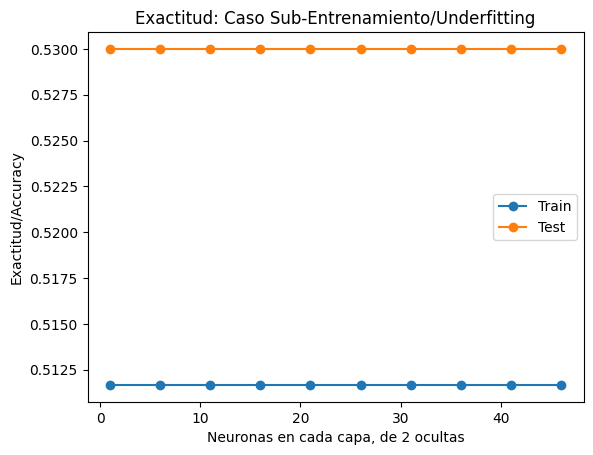

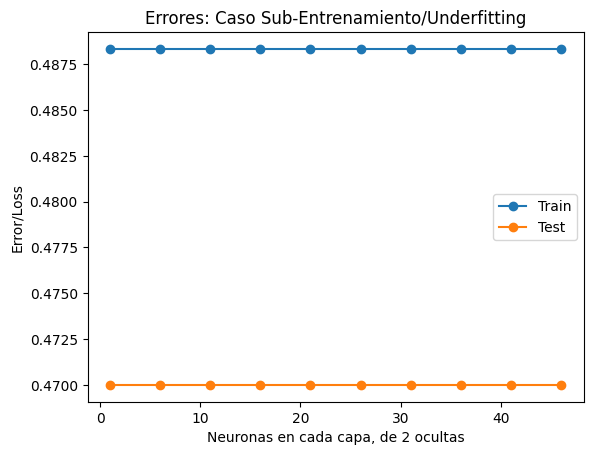

In [104]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, test_scores, '-o', label='Test')
plt.legend()
plt.title('Exactitud: Caso Sub-Entrenamiento/Underfitting')
plt.xlabel('Neuronas en cada capa, de 2 ocultas')
plt.ylabel('Exactitud/Accuracy')
plt.show()

plt.plot(neuronas, train_errors, "-o", label="Train")
plt.plot(neuronas, test_errors, "-o", label="Test")
plt.legend()
plt.title("Errores: Caso Sub-Entrenamiento/Underfitting")
plt.xlabel("Neuronas en cada capa, de 2 ocultas")
plt.ylabel("Error/Loss")
plt.show()

### 5.2.2 Modelo Sobre-Entrenado

Repetiremos básicamente el mismo ejercicio anterior con unas pequeñas variantes para resaltar el tipo de modelo sobreentrenado.

In [109]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np


X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    flip_y=0.3, 
    random_state=17
    )
print(f"Features set shape {X.shape}, Target set shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=11
)
print(
    f"Train Features shape: {X_train.shape}, Test Features shape: {X_test.shape}, Train Target shape: { y_train.shape}, Test Target Shape: {y_test.shape}"
)

neuronas = [i for i in range(1, 50, 5)]
print(f"Neuronas: {neuronas}")

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:
    model = MLPClassifier(
        hidden_layer_sizes=(i, i), 
        max_iter=3000, 
        alpha=0.15, 
        random_state=42
    )

    model.fit(X_train, y_train)

    # Predicciones y métricas con el conjunto de entrenamiento:
    train_yhat = model.predict(X_train)

    train_loss = np.mean(abs(y_train - train_yhat))
    train_errors.append(train_loss)

    train_acc = 1 - train_loss
    train_scores.append(train_acc)

    # Predicciones y métricas con el conjunto de prueba:
    test_yhat = model.predict(X_test)

    test_loss = np.mean(abs(y_test - test_yhat))
    test_errors.append(test_loss)

    test_acc = 1 - test_loss
    test_scores.append(test_acc)

    # Evolución de las métricas durante el enterenamoento:
    print(
        f"> {i}... \t trainacc: {train_acc:.3f}, testacc: {test_acc:.3f}, trainloss: {train_loss:.3f}, testloss: {test_loss:.3f}"
    )

Features set shape (1000, 20), Target set shape: (1000,)
Train Features shape: (800, 20), Test Features shape: (200, 20), Train Target shape: (800,), Test Target Shape: (200,)
Neuronas: [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
> 1... 	 trainacc: 0.520, testacc: 0.515, trainloss: 0.480, testloss: 0.485
> 6... 	 trainacc: 0.833, testacc: 0.740, trainloss: 0.168, testloss: 0.260
> 11... 	 trainacc: 0.921, testacc: 0.675, trainloss: 0.079, testloss: 0.325
> 16... 	 trainacc: 0.995, testacc: 0.715, trainloss: 0.005, testloss: 0.285
> 21... 	 trainacc: 1.000, testacc: 0.675, trainloss: 0.000, testloss: 0.325
> 26... 	 trainacc: 1.000, testacc: 0.690, trainloss: 0.000, testloss: 0.310
> 31... 	 trainacc: 1.000, testacc: 0.710, trainloss: 0.000, testloss: 0.290
> 36... 	 trainacc: 1.000, testacc: 0.700, trainloss: 0.000, testloss: 0.300
> 41... 	 trainacc: 1.000, testacc: 0.690, trainloss: 0.000, testloss: 0.310
> 46... 	 trainacc: 1.000, testacc: 0.705, trainloss: 0.000, testloss: 0.295


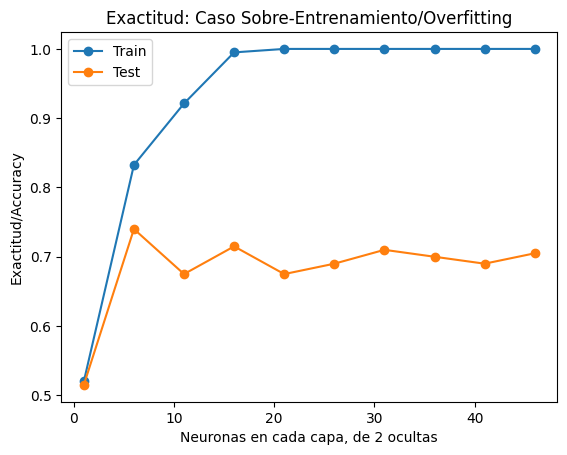

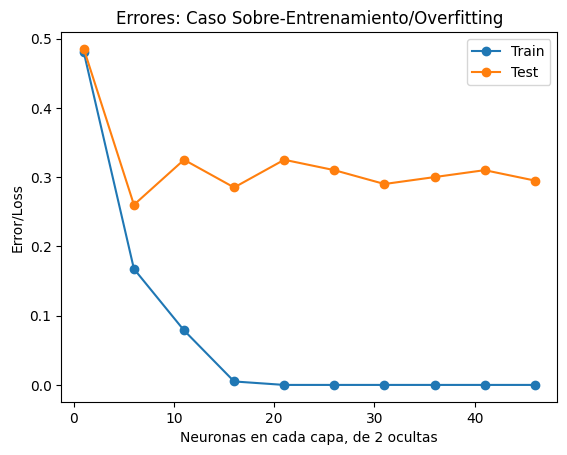

In [111]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, "-o", label="Train")
plt.plot(neuronas, test_scores, "-o", label="Test")
plt.legend()
plt.title("Exactitud: Caso Sobre-Entrenamiento/Overfitting")
plt.xlabel("Neuronas en cada capa, de 2 ocultas")
plt.ylabel("Exactitud/Accuracy")
plt.show()

plt.plot(neuronas, train_errors, "-o", label="Train")
plt.plot(neuronas, test_errors, "-o", label="Test")
plt.legend()
plt.title("Errores: Caso Sobre-Entrenamiento/Overfitting")
plt.xlabel("Neuronas en cada capa, de 2 ocultas")
plt.ylabel("Error/Loss")
plt.show()

Al reducir el factor de regularización a 0.15, los pesos pueden ser más grandes, lo que lleva al sobreentrenamiento. Esto se observa en las curvas de aprendizaje:

- **Exactitud**: La curva de entrenamiento alcanza el 100%, mientras que la de prueba se separa significativamente, indicando que el modelo memoriza los datos de entrenamiento pero no generaliza bien.
- **Errores**: Los errores de entrenamiento se acercan a cero, mientras que los de prueba permanecen altos a partir de 5 neuronas por capa oculta.

Esta discrepancia refleja alta varianza, es decir, una gran diferencia entre los datos reales y las predicciones.


## 5.3 Mejorando el Ajuste

Se busca mejorar el ajuste del modelo para que realice predicciones adecuadas tanto en el conjunto de entrenamiento como en el de prueba, logrando generalización con datos nuevos. 

Se generan datos con ligeras variaciones y se ajusta el modelo con un valor intermedio de regularización (`alpha=0.7`). Este valor permite que la curva del conjunto de prueba crezca de manera similar a la del conjunto de entrenamiento, optimizando el desempeño del modelo.


In [119]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np


X, y = make_classification(n_samples=10000, n_features=20, flip_y=0.2, random_state=17)
print(f"Features set shape {X.shape}, Target set shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.6, random_state=11
)
print(
    f"Train Features shape: {X_train.shape}, Test Features shape: {X_test.shape}, Train Target shape: { y_train.shape}, Test Target Shape: {y_test.shape}"
)

neuronas = [i for i in range(1, 50, 5)]
print(f"Neuronas: {neuronas}")

train_scores, test_scores = list(), list()
train_errors, test_errors = list(), list()

for i in neuronas:
    model = MLPClassifier(
        hidden_layer_sizes=(i, i), max_iter=1000, alpha=0.7, random_state=42
    )

    model.fit(X_train, y_train)

    # Predicciones y métricas con el conjunto de entrenamiento:
    train_yhat = model.predict(X_train)

    train_loss = np.mean(abs(y_train - train_yhat))
    train_errors.append(train_loss)

    train_acc = 1 - train_loss
    train_scores.append(train_acc)

    # Predicciones y métricas con el conjunto de prueba:
    test_yhat = model.predict(X_test)

    test_loss = np.mean(abs(y_test - test_yhat))
    test_errors.append(test_loss)

    test_acc = 1 - test_loss
    test_scores.append(test_acc)

    # Evolución de las métricas durante el enterenamoento:
    print(
        f"> {i}... \t trainacc: {train_acc:.3f}, testacc: {test_acc:.3f}, trainloss: {train_loss:.3f}, testloss: {test_loss:.3f}"
    )

Features set shape (10000, 20), Target set shape: (10000,)
Train Features shape: (6000, 20), Test Features shape: (4000, 20), Train Target shape: (6000,), Test Target Shape: (4000,)
Neuronas: [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
> 1... 	 trainacc: 0.502, testacc: 0.506, trainloss: 0.498, testloss: 0.494
> 6... 	 trainacc: 0.871, testacc: 0.871, trainloss: 0.130, testloss: 0.129
> 11... 	 trainacc: 0.871, testacc: 0.871, trainloss: 0.129, testloss: 0.129
> 16... 	 trainacc: 0.873, testacc: 0.870, trainloss: 0.127, testloss: 0.130
> 21... 	 trainacc: 0.873, testacc: 0.869, trainloss: 0.127, testloss: 0.131
> 26... 	 trainacc: 0.874, testacc: 0.873, trainloss: 0.126, testloss: 0.127
> 31... 	 trainacc: 0.876, testacc: 0.868, trainloss: 0.124, testloss: 0.132
> 36... 	 trainacc: 0.877, testacc: 0.868, trainloss: 0.123, testloss: 0.132
> 41... 	 trainacc: 0.877, testacc: 0.865, trainloss: 0.123, testloss: 0.135
> 46... 	 trainacc: 0.876, testacc: 0.865, trainloss: 0.124, testloss: 0.135


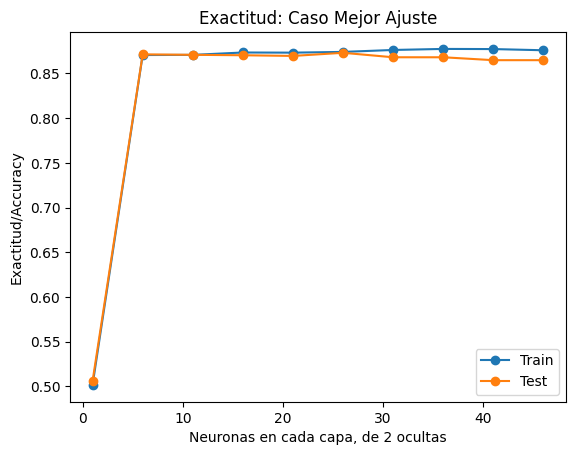

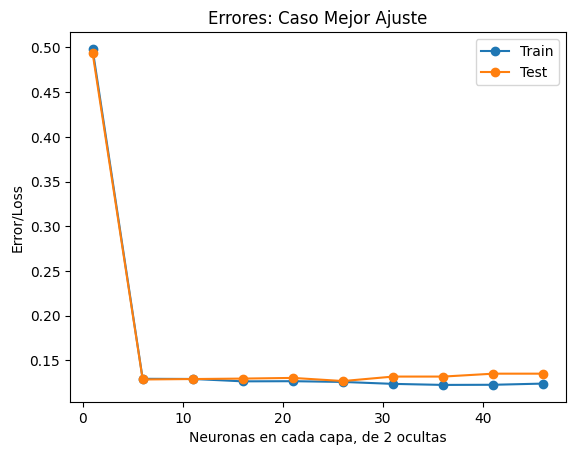

In [120]:
import matplotlib.pyplot as plt

plt.plot(neuronas, train_scores, "-o", label="Train")
plt.plot(neuronas, test_scores, "-o", label="Test")
plt.legend()
plt.title("Exactitud: Caso Mejor Ajuste")
plt.xlabel("Neuronas en cada capa, de 2 ocultas")
plt.ylabel("Exactitud/Accuracy")
plt.show()

plt.plot(neuronas, train_errors, "-o", label="Train")
plt.plot(neuronas, test_errors, "-o", label="Test")
plt.legend()
plt.title("Errores: Caso Mejor Ajuste")
plt.xlabel("Neuronas en cada capa, de 2 ocultas")
plt.ylabel("Error/Loss")
plt.show()

La gráfica muestra cómo el modelo aprende con la métrica de exactitud. Se observa que las curvas de entrenamiento y prueba son similares, indicando que el modelo es generalizable y puede predecir datos nuevos de manera consistente.

El ajuste del parámetro de regularización generó un modelo que generaliza adecuadamente, aunque la exactitud máxima alcanzada es del 87%, menor al 100% del caso sobreentrenado. Esto es normal, ya que un modelo equilibrado busca buen desempeño en ambos conjuntos (entrenamiento y prueba).

Un modelo que aprende al mismo ritmo en ambos conjuntos puede mostrar una disminución en la exactitud. Es responsabilidad del científico de datos determinar si esta disminución está dentro del margen aceptable.

Estos razonamientos aplican tanto a curvas de exactitud como de error, y son útiles en problemas de clasificación y regresión, adaptando las métricas según el caso.


# L6 - Matriz de confusión e interpretación de resultados​

## 6.1 - Matríz de Confusión

En problemas de clasificación, no basta con optimizar la exactitud; es crucial analizar los diferentes tipos de errores y su impacto. La matriz de confusión es una herramienta clave para evaluar el desempeño del modelo, permitiendo visualizar tanto los errores como las predicciones correctas. Esto ayuda a identificar qué errores son más costosos, no solo en términos financieros, sino también en otros contextos relevantes.


## 6.2 - Clasificación Binaria

Ahora revisa el caso de un problema de clasificación binario, pero el razonamiento se puede generalizar fácilmente a un problema multiclase.

Usarás una base de datos con registros de pacientes con diagnóstico de cáncer de mama, que podrás descargar de la sección de archivos adjuntos de la plataforma.


Cada registro contiene 30 predictores, además de su etiqueta real. La librería Scikit-learn te permite acceder fácilmente a esta base de datos con un par de líneas de comando como se muestra a continuación. 
Tienes 569 registros. En particular la variable con las etiquetas reales “y” registra el valor de 0 en el caso de un tumor maligno y el valor de 1 para el caso benigno. Esto se puede consultar en la documentación respectiva o mediante las siguientes instrucciones:





In [121]:
from sklearn.datasets import load_breast_cancer

x, y = load_breast_cancer(return_X_y=True)
print(x.shape, y.shape)

(569, 30) (569,)


Por la manera en que se registraron las etiquetas reales en la variable “y”, la clase negativa es el caso de tumor maligno y la clase positiva corresponde al caso de tumor benigno.

In [128]:
print(f"Valores objetivo (15-25): {y[15:25]}") # 0:Maligno, 1:Beningno
print(f"Nombres de objetivo: {load_breast_cancer().target_names}")

Valores objetivo (15-25): [0 0 0 0 1 1 1 0 0 0]
Nombres de objetivo: ['malignant' 'benign']


Ahora observa el primer registro de los predictores o datos de entrada X y los respectivos nombres de cada factor:


In [129]:
print(f"Primer registro: {x[0,:]}")
print(f"Nombres de variables: {load_breast_cancer().feature_names}")

Primer registro: [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Nombres de variables: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


La manera en que se capturó la base de datos fue con 569 imágenes de pacientes con cáncer de mama. Cada imagen de cada paciente contenía entre 10 y 40 núcleos celulares cancerígenos, de los cuales se extrajeron 10 métricas definidas por los médicos.


La base de datos contiene 569 registros de pacientes con cáncer de mama, cada uno con 30 factores. Estos se dividen en:

- **Primeras 10 columnas**: Promedios de métricas de núcleos celulares.
- **Siguientes 10 columnas**: Desviaciones estándar de dichas métricas.
- **Últimas 10 columnas**: Métricas de la peor célula cancerígena.

El problema es de clasificación binaria, aproximadamente balanceado:
- **62.7%**: Tumores benignos.
- **37.3%**: Tumores malignos.


In [143]:
print(f"Porcentaje Beningno: {100 * (sum(y) / y.shape[0]):.2f}")
print(f"Porcentaje Maligno: {100 * (1 - sum(y) / y.shape[0]):.2f}")

Porcentaje Beningno: 62.74
Porcentaje Maligno: 37.26


Se particionan los datos en 60% para entrenamiento y 40% para prueba. Se entrena una red neuronal multicapa con 10 neuronas en la capa oculta y regularización L2 de 1.0, logrando una exactitud del 92.98% en los datos de prueba. Se analiza la distribución de predicciones correctas y erróneas mediante la matriz de confusión.


In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.6, random_state=11)

model = MLPClassifier(
    hidden_layer_sizes=(10),
    max_iter=1100,
    random_state=42
)

model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9429824561403509

La matriz de confusión es una herramienta clave en problemas de clasificación binaria para evaluar el desempeño del modelo. Contiene cuatro valores:

- **Verdadero Positivo (VP)**: Predicción correcta de la clase positiva.
- **Verdadero Negativo (VN)**: Predicción correcta de la clase negativa.
- **Falso Positivo (FP)**: Predicción incorrecta de la clase positiva.
- **Falso Negativo (FN)**: Predicción incorrecta de la clase negativa.

Es importante analizar cuál error (FP o FN) es más costoso según el contexto. Por ejemplo, en el caso del cáncer de mama:
- Un FP podría llevar a tratamientos innecesarios.
- Un FN podría retrasar el tratamiento, empeorando el pronóstico.

Además, se define la métrica de **exactitud (accuracy)**, que mide el porcentaje de predicciones correctas sobre el total. Su valor varía entre 0 y 1, donde valores cercanos a 1 indican mejor desempeño.

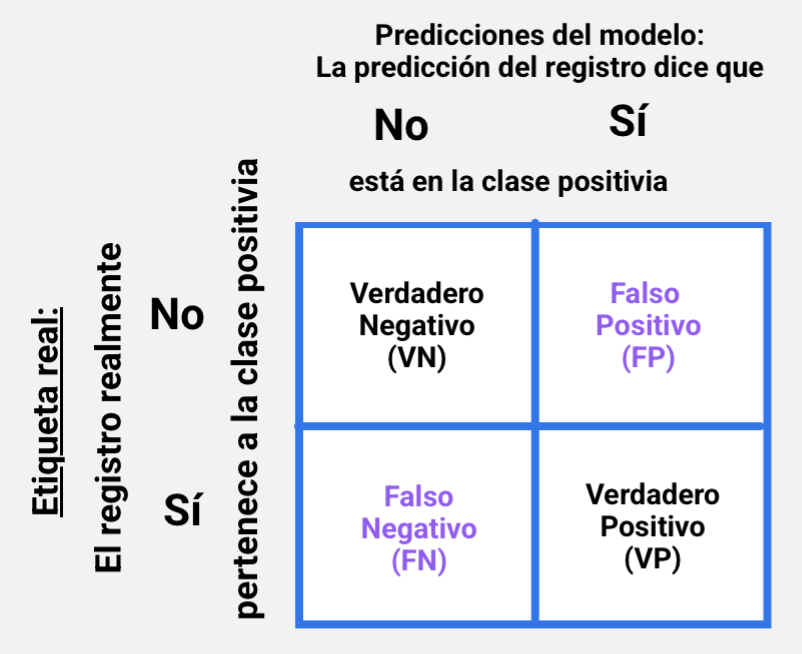


Regresemos al modelo generado con los datos de cáncer de mama, el cual mostró una exactitud de 92.98%.<br>Analicemos ahora su matriz de confusión.


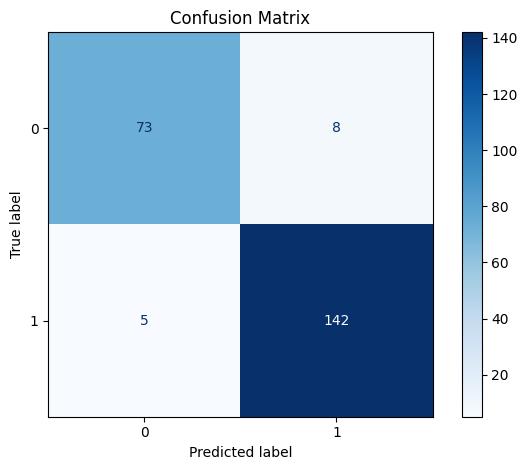

In [153]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test, labels=[0, 1], cmap="Blues"
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Modifiquemos ahora nuestra red neuronal aumentando de 10 a 15 neuronas en la capa oculta y obtengamos su exactitud con los datos de prueba.


Exactitud del modelo: 0.9517543859649122


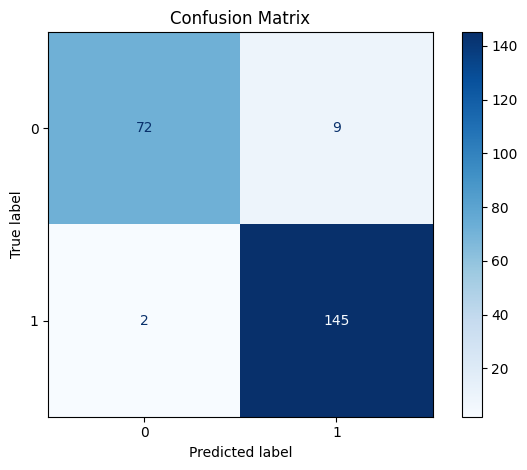

In [157]:
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=1100,random_state=42)

model.fit(x_train, y_train)
print(f"Exactitud del modelo: {model.score(x_test, y_test)}")

ConfusionMatrixDisplay.from_estimator(
    model, x_test, y_test, labels=[0, 1], cmap="Blues"
)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

En este caso, se usaron datos médicos, pero las implicaciones de cada decisión correcta o incorrecta deben ser evaluadas por expertos y tomadores de decisiones de la organización. Las predicciones de un modelo suelen tener implicaciones más allá del conocimiento del analista, por lo que es esencial trabajar directamente con los especialistas correspondientes.
